In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from os.path import join

In [2]:
dst = "/home/jana/TU_graz/teaching/SICSS/SICSS-aachen-graz/visualization/slides/img"

In [3]:
# colors
demblue = "#0015BC"
repred = "#FF0000"
demgrey = "#9EA4BF"
repgrey = "#BF9EA2"

# Figure and axis

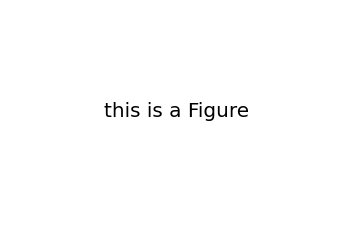

In [44]:
fig, ax = plt.subplots()
fig.text(0.35, 0.5, "this is a Figure", fontsize=20)
ax.set_axis_off()
plt.savefig(join(dst, "figure.svg"))

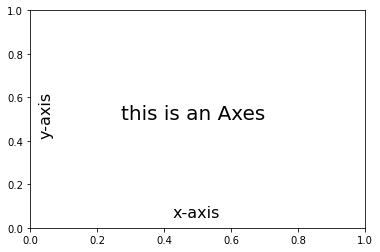

In [18]:
fig, ax = plt.subplots()
ax.text(0.27, 0.5, "this is an Axes", fontsize=20)
ax.text(0.425, 0.05, "x-axis", fontsize=16)
ax.text(0.025, 0.425, "y-axis", rotation=90, fontsize=16)
plt.savefig(join(dst, "fig_and_axes.svg"))

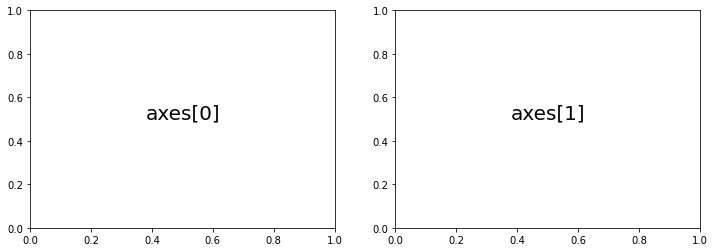

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].text(0.38, 0.5, "axes[0]", fontsize=20)
axes[1].text(0.38, 0.5, "axes[1]", fontsize=20)
plt.savefig(join(dst, "subplots.svg"))

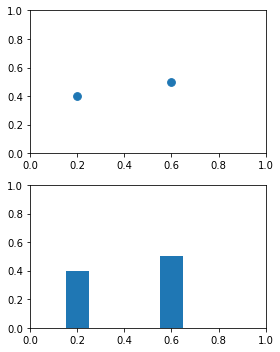

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(4, 5))

axes[0].scatter([0.2, 0.6], [0.4, 0.5], s=60)
axes[1].bar([0.2, 0.6], [0.4, 0.5], width=0.1)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
fig.tight_layout()
plt.savefig(join(dst, "artists_1.svg"), facecolor="w")

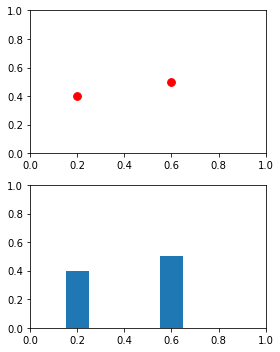

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(4, 5))

axes[0].scatter([0.2, 0.6], [0.4, 0.5], s=60, color="r")
axes[1].bar([0.2, 0.6], [0.4, 0.5], width=0.1)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
fig.tight_layout()
plt.savefig(join(dst, "artists_2.svg"), facecolor="w")

/tmp/ipykernel_21242/3083005028.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels([0, 1], color="w")


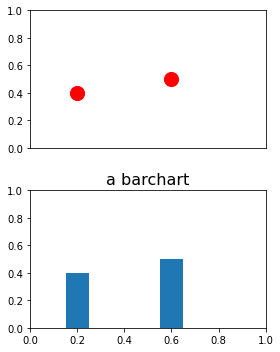

In [72]:
fig, axes = plt.subplots(2, 1, figsize=(4, 5))

axes[0].scatter([0.2, 0.6], [0.4, 0.5], s=200, color="r")
axes[1].bar([0.2, 0.6], [0.4, 0.5], width=0.1)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[0].set_xticklabels([0, 1], color="w")
axes[1].set_title("a barchart", fontsize=16)
axes[0].tick_params(axis='x', which='both',length=0)
fig.tight_layout()
plt.savefig(join(dst, "artists_3.svg"), facecolor="w")

# Histogram

In [401]:
users = pd.read_csv("users.csv", dtype={"author_id":str})
users.head(2)

,handle,author_id,party,NG_score_mean,belief_share,truth_share,belief_share_2010_to_2013,truth_share_2010_to_2013,belief_share_2019_to_2022,truth_share_2019_to_2022,tweet_count
0,RepLipinski,1009269193,Democrat,93.193439,0.050677,0.188008,NaN,NaN,0.053934,0.214467,2761
1,DickBlumenthal,102477372,Democrat,NaN,0.000000,0.181818,0.0,0.0,NaN,NaN,11


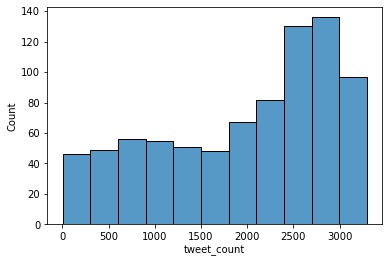

In [390]:
sns.histplot(
    data=users, 
    x="tweet_count"
)
plt.savefig(join(dst, "histogram_1.svg"))

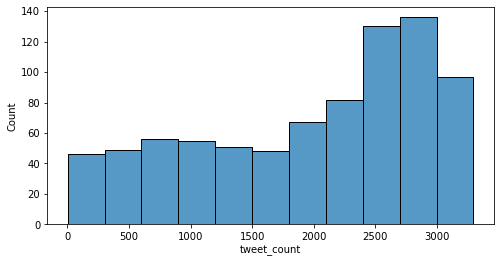

In [391]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(
    data=users, 
    x="tweet_count", 
    ax=ax
)
plt.savefig(join(dst, "histogram_2.svg"))

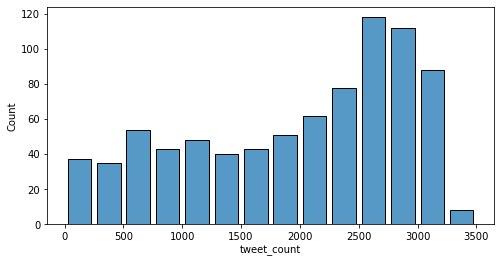

In [392]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(
    data=users, 
    x="tweet_count", 
    ax=ax,
    bins=range(0, 3510, 250),
    shrink=0.8
)
plt.savefig(join(dst, "histogram_3.svg"))

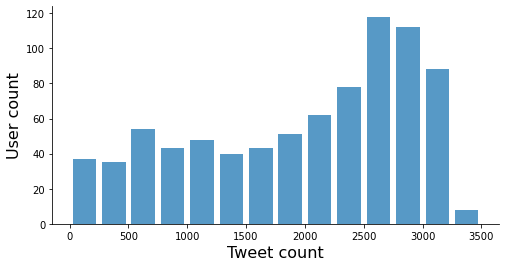

In [398]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(
    data=users, 
    x="tweet_count", 
    ax=ax,
    bins=range(0, 3510, 250),
    shrink=.8,
    edgecolor=None
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Tweet count", fontsize=16)
ax.set_ylabel("User count", fontsize=16)
plt.savefig(join(dst, "histogram_4.svg"))

# Bar chart

In [4]:
users = pd.read_csv("data/users.csv", dtype={"author_id":str})
users.head(2)

,handle,author_id,party,NG_score_mean,belief_share,truth_share,belief_share_2010_to_2013,truth_share_2010_to_2013,belief_share_2019_to_2022,truth_share_2019_to_2022,tweet_count
0,RepLipinski,1009269193,Democrat,93.193439,0.050677,0.188008,NaN,NaN,0.053934,0.214467,2761
1,DickBlumenthal,102477372,Democrat,NaN,0.000000,0.181818,0.0,0.0,NaN,NaN,11


In [5]:
# histplot() requires "long-form" data, we therefore reshape the data frame
# to match the required input
belief_speaking = pd.melt(
    users, 
    id_vars=["handle", "author_id", "party"],
    value_vars=["belief_share_2010_to_2013", "belief_share_2019_to_2022"],
    var_name="time_period",
    value_name="proportion"
)

# rename the values in the newly created "time_period" column to contain only
# the required information
belief_speaking["time_period"] = belief_speaking["time_period"].replace({
    "belief_share_2010_to_2013":"2010 to 2013",
    "belief_share_2019_to_2022":"2019 to 2022"
})
belief_speaking["proportion"] = belief_speaking["proportion"] * 100

In [6]:
belief_speaking.head(2)

,handle,author_id,party,time_period,proportion
0,RepLipinski,1009269193,Democrat,2010 to 2013,NaN
1,DickBlumenthal,102477372,Democrat,2010 to 2013,0.0


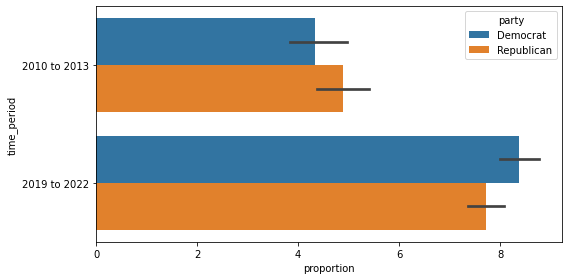

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(
    data=belief_speaking,
    x="proportion", 
    y="time_period",
    hue="party",
    ax=ax,
)
fig.tight_layout()
plt.savefig(join(dst, "barchart_1.svg"))

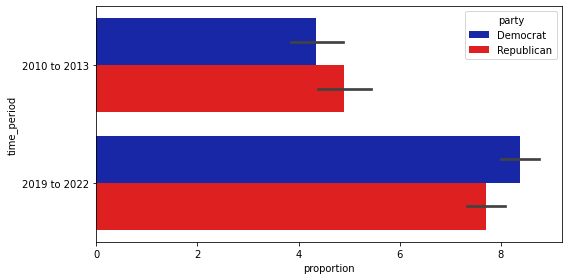

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(
    data=belief_speaking,
    x="proportion", 
    y="time_period",
    hue="party",
    ax=ax,
    palette=[demblue, repred], 
    hue_order=["Democrat", "Republican"]
)
fig.tight_layout()
plt.savefig(join(dst, "barchart_2.svg"))

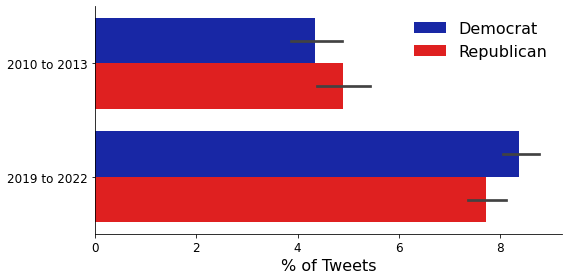

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(
    data=belief_speaking,
    x="proportion", 
    y="time_period",
    hue="party",
    ax=ax,
    palette=[demblue, repred], 
    hue_order=["Democrat", "Republican"]
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False, fontsize=16)
ax.set_ylabel("")
ax.set_xlabel("% of Tweets", fontsize=16)
ax.tick_params(axis='both', labelsize=12) 
fig.tight_layout()
plt.savefig(join(dst, "barchart_3.svg"))

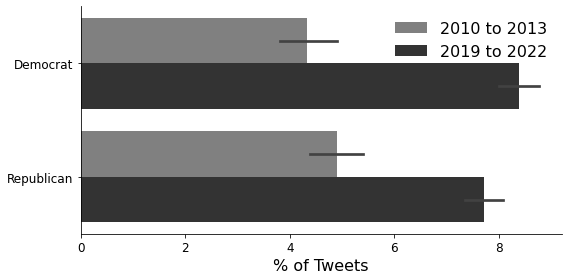

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(
    data=belief_speaking,
    x="proportion", 
    y="party",
    hue="time_period",
    ax=ax,
    palette=[(0.5, 0.5, 0.5), (0.2, 0.2, 0.2)], 
    hue_order=["2010 to 2013", "2019 to 2022"]
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False, fontsize=16)
ax.set_ylabel("")
ax.set_xlabel("% of Tweets", fontsize=16)
ax.tick_params(axis='both', labelsize=12) 
fig.tight_layout()
plt.savefig(join(dst, "barchart_4.svg"))

In [400]:
topics = pd.read_csv("data/topics.csv")
topics.head(2)

,Topic,Component,Party,Frequency,Frequency_norm,Name
0,2,belief-speaking,Democrat,606,7.142015,abortion $\vert$ woman $\vert$ right $\vert$ life
1,2,truth-seeking,Democrat,848,9.994107,abortion $\vert$ woman $\vert$ right $\vert$ life


In [97]:
belief = topics[topics["Component"] == "belief-speaking"]
truth = topics[topics["Component"] == "truth-seeking"]

In [95]:
import seaborn as sns

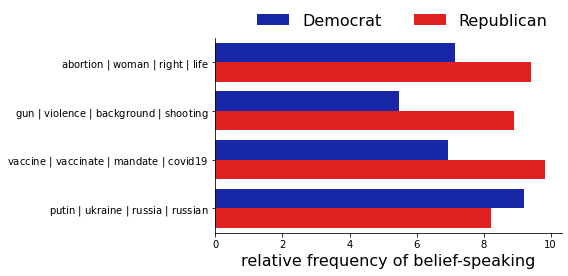

In [117]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(
    x="Frequency_norm", 
    y="Name",
    hue="Party",
    data=belief,
    ax=ax,
    palette=[demblue, repred], 
    hue_order=["Democrat", "Republican"]
)

ax.set_ylabel("")
ax.set_xlabel("relative frequency of belief-speaking", fontsize=16)
legend = ax.legend(loc=1, bbox_to_anchor=[1, 1.2, 0, 0], fontsize=16, ncol=2)
legend.get_frame().set_facecolor((1, 1, 1, 1))
legend.get_frame().set_edgecolor((1, 1, 1, 1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()
plt.savefig(join(dst, "barchart.svg"), facecolor="w")

# Time series

In [120]:
counts = pd.read_csv("data/tweet_counts.csv", parse_dates=["date"])
counts = counts.set_index("date")
dem = counts[counts["party"] == "Democrat"]
rep = counts[counts["party"] == "Republican"]

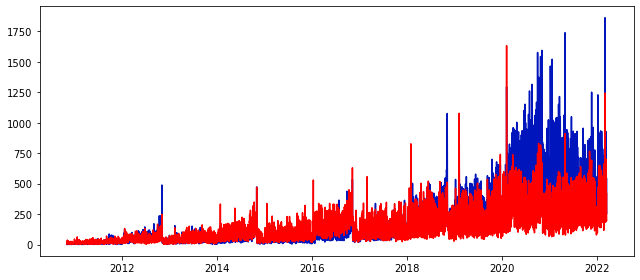

In [121]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(
    dem.index,
    dem["tweet_count"],
    color=demblue, 
)
ax.plot(
    rep.index,
    rep["tweet_count"],
    color=repred, 
)
fig.tight_layout()
plt.savefig(join(dst, "timeseries_1.svg"))

In [130]:
counts = pd.read_csv("data/tweet_counts.csv", parse_dates=["date"])
counts = counts.set_index("date")
dem = counts[counts["party"] == "Democrat"].rolling("90D").mean()
rep = counts[counts["party"] == "Republican"].rolling("90D").mean()

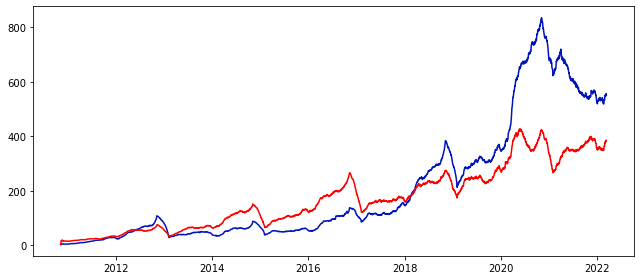

In [131]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(
    dem.index,
    dem["tweet_count"],
    color=demblue, 
)
ax.plot(
    rep.index,
    rep["tweet_count"],
    color=repred, 
)
fig.tight_layout()
plt.savefig(join(dst, "timeseries_2.svg"))

In [134]:
counts = pd.read_csv("data/tweet_counts.csv", parse_dates=["date"])
counts = counts.set_index("date")
dem = counts[counts["party"] == "Democrat"].rolling("90D").mean()
rep = counts[counts["party"] == "Republican"].rolling("90D").mean()

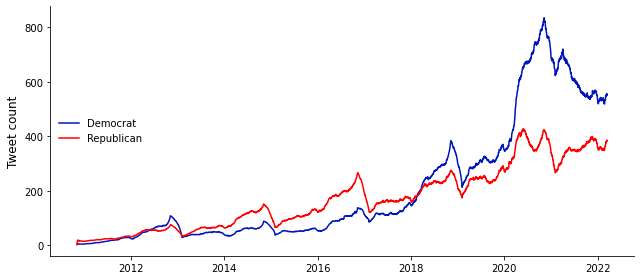

In [135]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(
    dem.index,
    dem["tweet_count"],
    color=demblue, 
    label="Democrat"
)
ax.plot(
    rep.index,
    rep["tweet_count"],
    color=repred, 
    label="Republican"
)
ax.set_ylabel("Tweet count", fontsize=12)
ax.legend(frameon=False, loc=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig(join(dst, "timeseries_3.svg"))

In [136]:
counts = pd.read_csv("data/tweet_counts.csv", parse_dates=["date"])
counts = counts.set_index("date")
dem = counts[counts["party"] == "Democrat"].rolling("90D").mean()
rep = counts[counts["party"] == "Republican"].rolling("90D").mean()

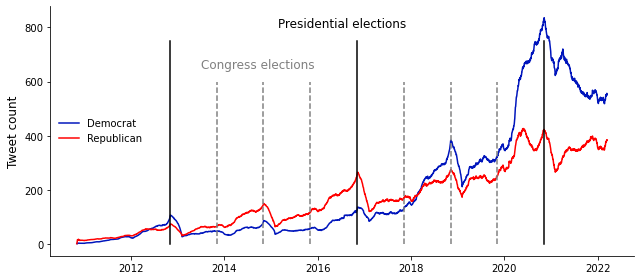

In [137]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(
    dem.index,
    dem["tweet_count"],
    color=demblue, 
    label="Democrat"
)
ax.plot(
    rep.index,
    rep["tweet_count"],
    color=repred, 
    label="Republican"
)
ax.set_ylabel("Tweet count", fontsize=12)
ax.legend(frameon=False, loc=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

p_elections = [pd.to_datetime(date) for\
            date in ["2012-11-06", "2016-11-08", "2020-11-03"]]

s_elections = [pd.to_datetime(date) for\
            date in ["2013-11-05", "2014-11-04", "2015-11-03",
                     "2017-11-07", "2018-11-06", "2019-11-05"]]

for el in p_elections:
    ax.plot([el, el], [0, 750], color="k")
for el in s_elections:
    ax.plot([el, el], [0, 600], "--", color="grey")
    
ax.text(pd.to_datetime("2013-07-01"), 650,
        "Congress elections", color="grey", fontsize=12)
ax.text(pd.to_datetime("2015-03-01"),
        800, "Presidential elections", color="k", fontsize=12)

fig.tight_layout()
plt.savefig(join(dst, "timeseries_4.svg"))

# Scatter plot

In [203]:
users = pd.read_csv("data/users.csv", dtype={"author_id":str})
users = users[users["party"].isin(["Democrat", "Republican"])]
users.head(2)

,handle,author_id,name,party,N_tweets,followers_count,following_count,tweet_count,created_at,congress,NG_score_mean,belief_share,truth_share,belief_share_2010_to_2013,truth_share_2010_to_2013,belief_share_2019_to_2022,truth_share_2019_to_2022,ideology_mean,followers_count_log,following_count_log
0,RepLipinski,1009269193,Former Rep. Daniel Lipinski,Democrat,3179,19893.0,2478.0,4359.0,2012-12-13 17:03:06+00:00,116.0,93.193439,0.050677,0.188008,NaN,NaN,0.053934,0.214467,0.471657,9.898123,7.815207
1,CaptClayHiggins,1011053278304592000,Clay Higgins,Republican,21,3289.0,156.0,24.0,2018-06-25 01:07:40+00:00,116.0,NaN,0.000000,0.230769,NaN,NaN,0.000000,0.181818,0.282969,8.098339,5.049856


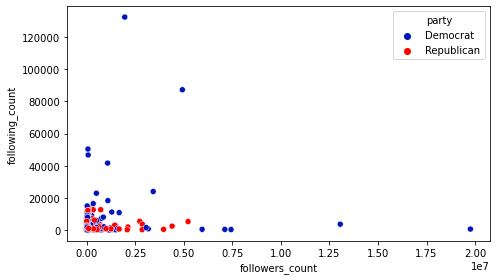

In [231]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(
    data=users, 
    x="followers_count", 
    y="following_count", 
    hue="party",
    palette=[demblue, repred],
    hue_order=["Democrat", "Republican"],
    ax=ax
)

fig.tight_layout()
plt.savefig(join(dst, "scatterplot_1.svg"))

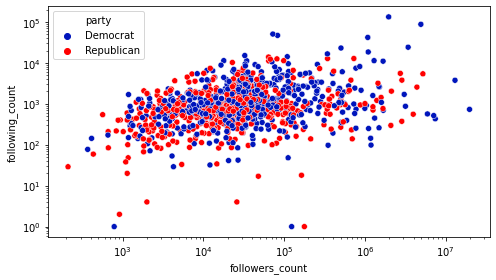

In [232]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(
    data=users, 
    x="followers_count", 
    y="following_count", 
    hue="party",
    palette=[demblue, repred],
    hue_order=["Democrat", "Republican"],
    ax=ax
)
ax.set_yscale("log")
ax.set_xscale("log")

fig.tight_layout()
plt.savefig(join(dst, "scatterplot_2.svg"))

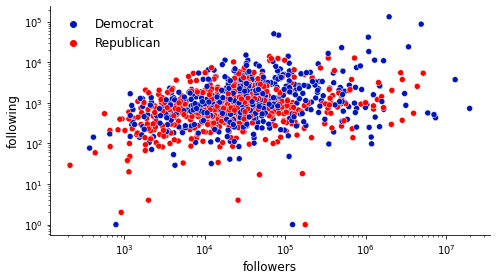

In [236]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(
    data=users, 
    x="followers_count", 
    y="following_count", 
    hue="party",
    palette=[demblue, repred],
    hue_order=["Democrat", "Republican"],
    ax=ax
)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("followers", fontsize=12)
ax.set_ylabel("following", fontsize=12)
ax.legend(frameon=False, fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()
plt.savefig(join(dst, "scatterplot_3.svg"))

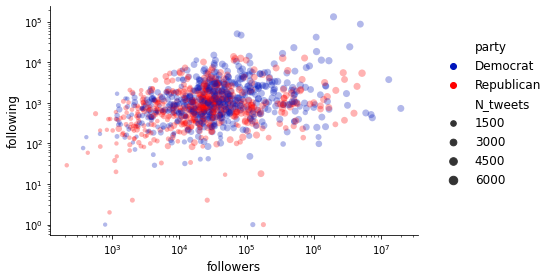

In [249]:
fig, ax = plt.subplots(figsize=(8, 4))
grid = sns.scatterplot(
    data=users, 
    x="followers_count", 
    y="following_count", 
    size="N_tweets",
    hue="party",
    palette=[demblue, repred],
    hue_order=["Democrat", "Republican"],
    alpha=0.3,
    linewidth=0,
    ax=ax
)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("followers", fontsize=12)
ax.set_ylabel("following", fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False, loc=9,
          bbox_to_anchor=[1.2, 0.9, 0, 0], fontsize=12)

fig.tight_layout()
plt.savefig(join(dst, "scatterplot_4.svg"))

In [149]:
users["followers_count_log"] = np.log(users["followers_count"])
users["following_count_log"] = np.log(users["following_count"])

/home/jana/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [162]:
from scipy.stats import linregress

In [200]:
subset = users[["followers_count", "following_count"]].dropna().copy()
subset["followers_count"] = subset["followers_count"] + 1
subset["following_count"] = subset["following_count"] + 1
subset["followers_count_log"] = np.log(subset["followers_count"])
subset["following_count_log"] = np.log(subset["following_count"])

dem = subset[users["party"] == "Democrat"]
rep = subset[users["party"] == "Republican"]

slope_dem, intercept_dem, rval_dem, pval_dem, stderr_dem = \
    linregress(dem["followers_count_log"], dem["following_count_log"])
x_dem = np.arange(dem["followers_count_log"].min(), dem["followers_count_log"].max(), 0.1)
y_dem = slope_dem * x_dem + intercept_dem

slope_rep, intercept_rep, rval_rep, pval_rep, stderr_rep = \
    linregress(rep["followers_count_log"], rep["following_count_log"])
x_rep = np.arange(rep["followers_count_log"].min(), rep["followers_count_log"].max(), 0.1)
y_rep = slope_rep * x_rep + intercept_rep

/tmp/ipykernel_269069/3319662058.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dem = subset[users["party"] == "Democrat"]
/tmp/ipykernel_269069/3319662058.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rep = subset[users["party"] == "Republican"]


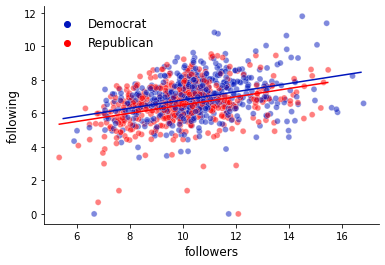

In [201]:
fig, ax = plt.subplots()
grid = sns.scatterplot(
    data=users, 
    x="followers_count_log", 
    y="following_count_log", 
    hue="party",
    palette=[demblue, repred],
    hue_order=["Democrat", "Republican"],
    alpha=0.5,
    ax=ax
)
ax.plot(x_dem, y_dem, color=demblue)
ax.plot(x_rep, y_rep, color=repred)
#ax = grid.ax_joint
ax.set_xlabel("followers", fontsize=12)
ax.set_ylabel("following", fontsize=12)
#ax.set_yscale("log")
#ax.set_xscale("log")
ax.legend(frameon=False, loc=2, fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Seaborn demo

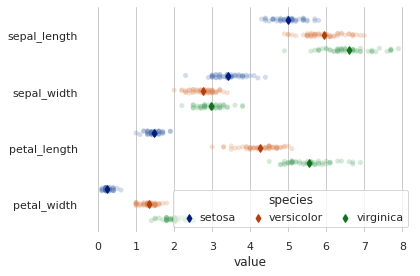

In [258]:
sns.set_theme(style="whitegrid")
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
fig, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
ax.set_ylabel("")
plt.tight_layout()
plt.savefig(join(dst, "seaborn_demo.svg"))